In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image


%matplotlib inline

In [2]:
subwayData = pickle.load( open( "subwayData.p", "rb" ) )
subwayData.head()

,date,line,dayType,travelId,trainId,notDispach,notDispachDetails,amountCars,dispached,time,terminal,depart,delay,delayInt,month,departHour
0,2015-01-01,A,F,1,4,NaN,NaN,5,N,07:32:00,1,2015-01-01 07:32:00,NaT,NaN,NaN,NaN
1,2015-01-01,A,F,2,5,NaN,NaN,5,N,07:42:00,1,2015-01-01 07:42:00,NaT,NaN,NaN,NaN
2,2015-01-01,A,F,3,6,NaN,NaN,5,S,07:52:00,1,2015-01-01 07:52:00,NaT,NaN,1-2015,7.0
3,2015-01-01,A,F,4,1,NaN,NaN,5,S,08:00:00,1,2015-01-01 08:00:00,00:08:00,8.000000,1-2015,8.0
4,2015-01-01,A,F,5,2,NaN,NaN,5,S,08:09:20,1,2015-01-01 08:09:20,00:09:20,9.333333,1-2015,8.0


In [3]:
subwayData.delayInt[~subwayData.delayInt.isnull()].describe()

count    1.372871e+06
mean     5.632108e+00
std      2.481499e+00
min      0.000000e+00
25%      3.666667e+00
50%      5.000000e+00
75%      7.183333e+00
max      2.900000e+01
Name: delayInt, dtype: float64

In [4]:
#dic colro for line 
lineColors = {'A':'dodgerblue','B':'red','C':'mediumblue','D':'forestgreen','E':'purple','H':'yellow','P':'coral'}

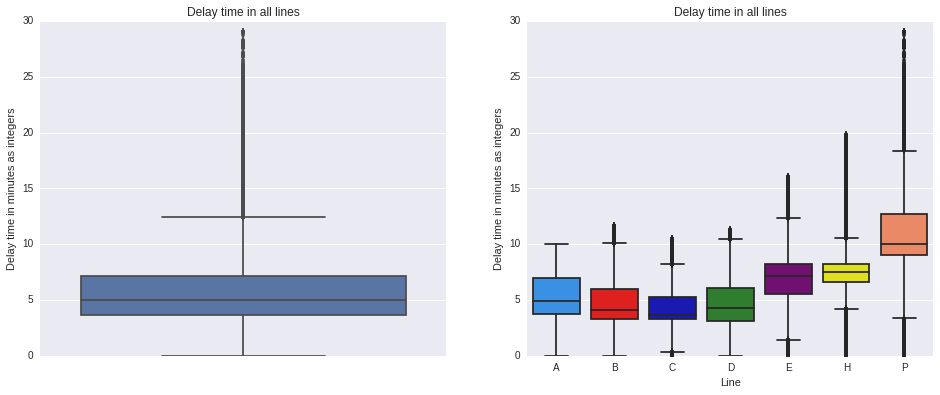

In [5]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax = sns.boxplot(subwayData.delayInt,orient = 'v')
ax.set_title('Delay time in all lines')
ax.set_ylabel('Delay time in minutes as integers')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.boxplot(subwayData.line,subwayData.delayInt,palette=lineColors)
ax2.set_title('Delay time in all lines')
ax2.set_ylabel('Delay time in minutes as integers')
ax2.set_xlabel('Line')

## Figure 1
The first plot shows that the median waiting time between one train and the other in the BA subway as a whole, is 5 minutes. This changes when we take a look to what happens on a line by line basis. The **C** line is the line with the best frequency (*3:41 minutes*). Next is the **B** line (*04:07 minutes*) followed closely by the **D** line (*04:15 minutes*). Also within 4 minutes, we find the the **A** line (*04:53 minutes*). Already in the 7 minutes we hace the **E** line (*07:10 minutes*) and the the **H** line (*7:30 minutes*). Finally the **P** line (*10 minutes*).

In [18]:
lines = subwayData.line.unique()
waitingTimeByLine = subwayData.delay.groupby(by=subwayData.line).describe()
for line in lines:
    print line,'median:',waitingTimeByLine[line]['50%'],line,'mean:',waitingTimeByLine[line]['mean']

A median: 0 days 00:04:53 A mean: 0 days 00:05:29.701089
B median: 0 days 00:04:07 B mean: 0 days 00:04:40.100174
C median: 0 days 00:03:41 C mean: 0 days 00:04:26.146126
D median: 0 days 00:04:15 D mean: 0 days 00:04:37.131126
E median: 0 days 00:07:10 E mean: 0 days 00:07:10.604048
H median: 0 days 00:07:30 H mean: 0 days 00:07:51.027811
P median: 0 days 00:10:00 P mean: 0 days 00:10:53.613542


Now, Mayor Larreta's public commitment was to reduce the waiting time for each subway to 3 minutes during roush hour. Classic rush hours can be defined between 8 and 10 am for the morning rush hour and between 5 to 7 pm for the evening rush hour. Also, it is necessary to take into account the terminal stations where we measure the waiting time. Buenos Aires City has a radial shape with a clear defined center. Over this underlying functional reality of the urban space, the subway lines were designed with two distintc types: **radial lines** (*A,B,D,E,P*), which connect city center with the most peripheral neighborhoods; and **circumferential lines** (only *C* and *H*), which go around city center and intersect the remaining lines perpendicularly. Therefore, while in the **circumferential lines** both rush hours periods are important (morning and evening) when considering the waiting time for a subway train, in the **radial lines** the really important one changes accordingly to the time of day. We want to check the waiting time on the peripheral terminal stations during the morning rush and on the center terminal stations during the evening rush.

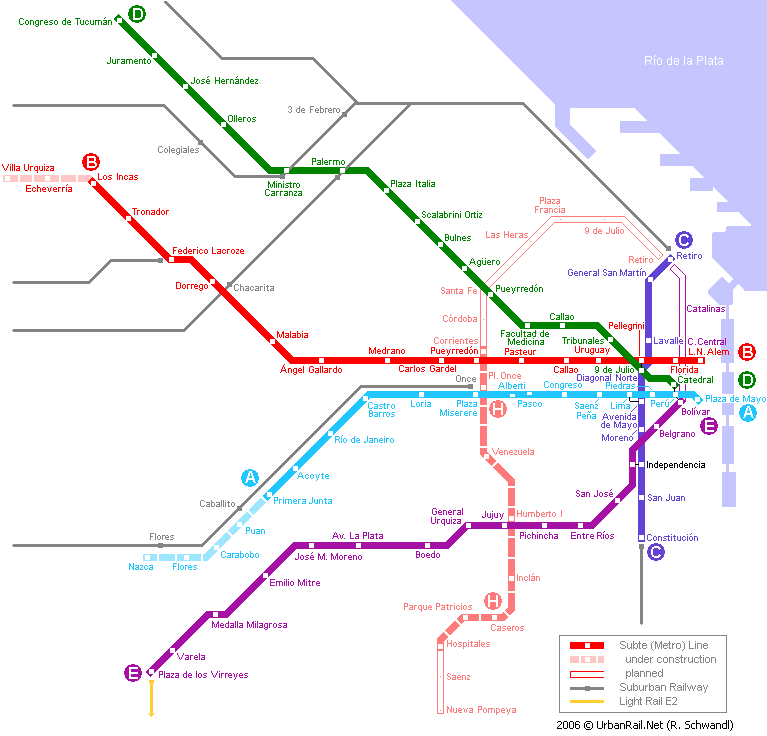

In [7]:
Image("img/baSubwayMap.png")

## Figure 2 - Buenos Aires Subway Map


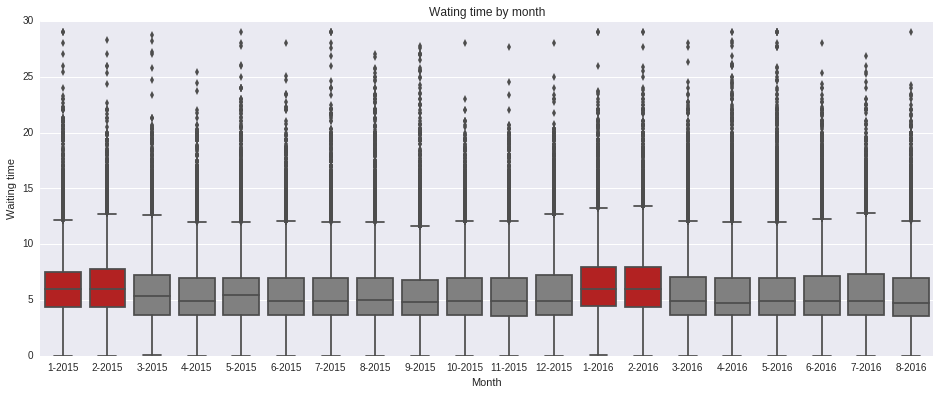

In [8]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
ax = sns.boxplot(subwayData.month,subwayData.delayInt,color='grey')
ax.artists[0].set_facecolor('firebrick')
ax.artists[1].set_facecolor('firebrick')
ax.artists[12].set_facecolor('firebrick')
ax.artists[13].set_facecolor('firebrick')

ax.set_title('Wating time by month')
ax.set_xlabel('Month')
ax.set_ylabel('Waiting time')

## Figure 3
The plot shows that during January and February, the most frequent holiday months in Argentina, waiting time increases, but afterwards, rapidly converge towards the 5 minutes median waiting time. There is no clear tendency of decreasing time towards the 3 minute goal, taking all the lines, in all the terminals during every hour. It remains to be seen if, after accounting for the terminals and rush hours, this goal is reached.

In [23]:
#create masks for rush hours during workdays 
workdayNotNan = (subwayData.dayType == 'H') &  (~subwayData.delay.isnull())
subwayData['rushMorning'] = (subwayData.departHour >= 8) & (subwayData.departHour <= 10) & workdayNotNan 
subwayData['rushEvening'] = (subwayData.departHour >= 17) & (subwayData.departHour <= 19) & workdayNotNan

In [15]:
print subwayData.shape
waitingTime = subwayData.copy().loc[subwayData.rushEvening |subwayData.rushMorning,['line','month','terminal','delay','delayInt','rushMorning','rushEvening']]
print waitingTime.shape
waitingTime.head()

(1623272, 18)
(418539, 7)


,line,month,terminal,delay,delayInt,rushMorning,rushEvening
493,A,1-2015,1,00:04:00,4.00,True,False
494,A,1-2015,1,00:03:45,3.75,True,False
495,A,1-2015,1,00:04:00,4.00,True,False
496,A,1-2015,1,00:04:09,4.15,True,False
497,A,1-2015,1,00:04:06,4.10,True,False


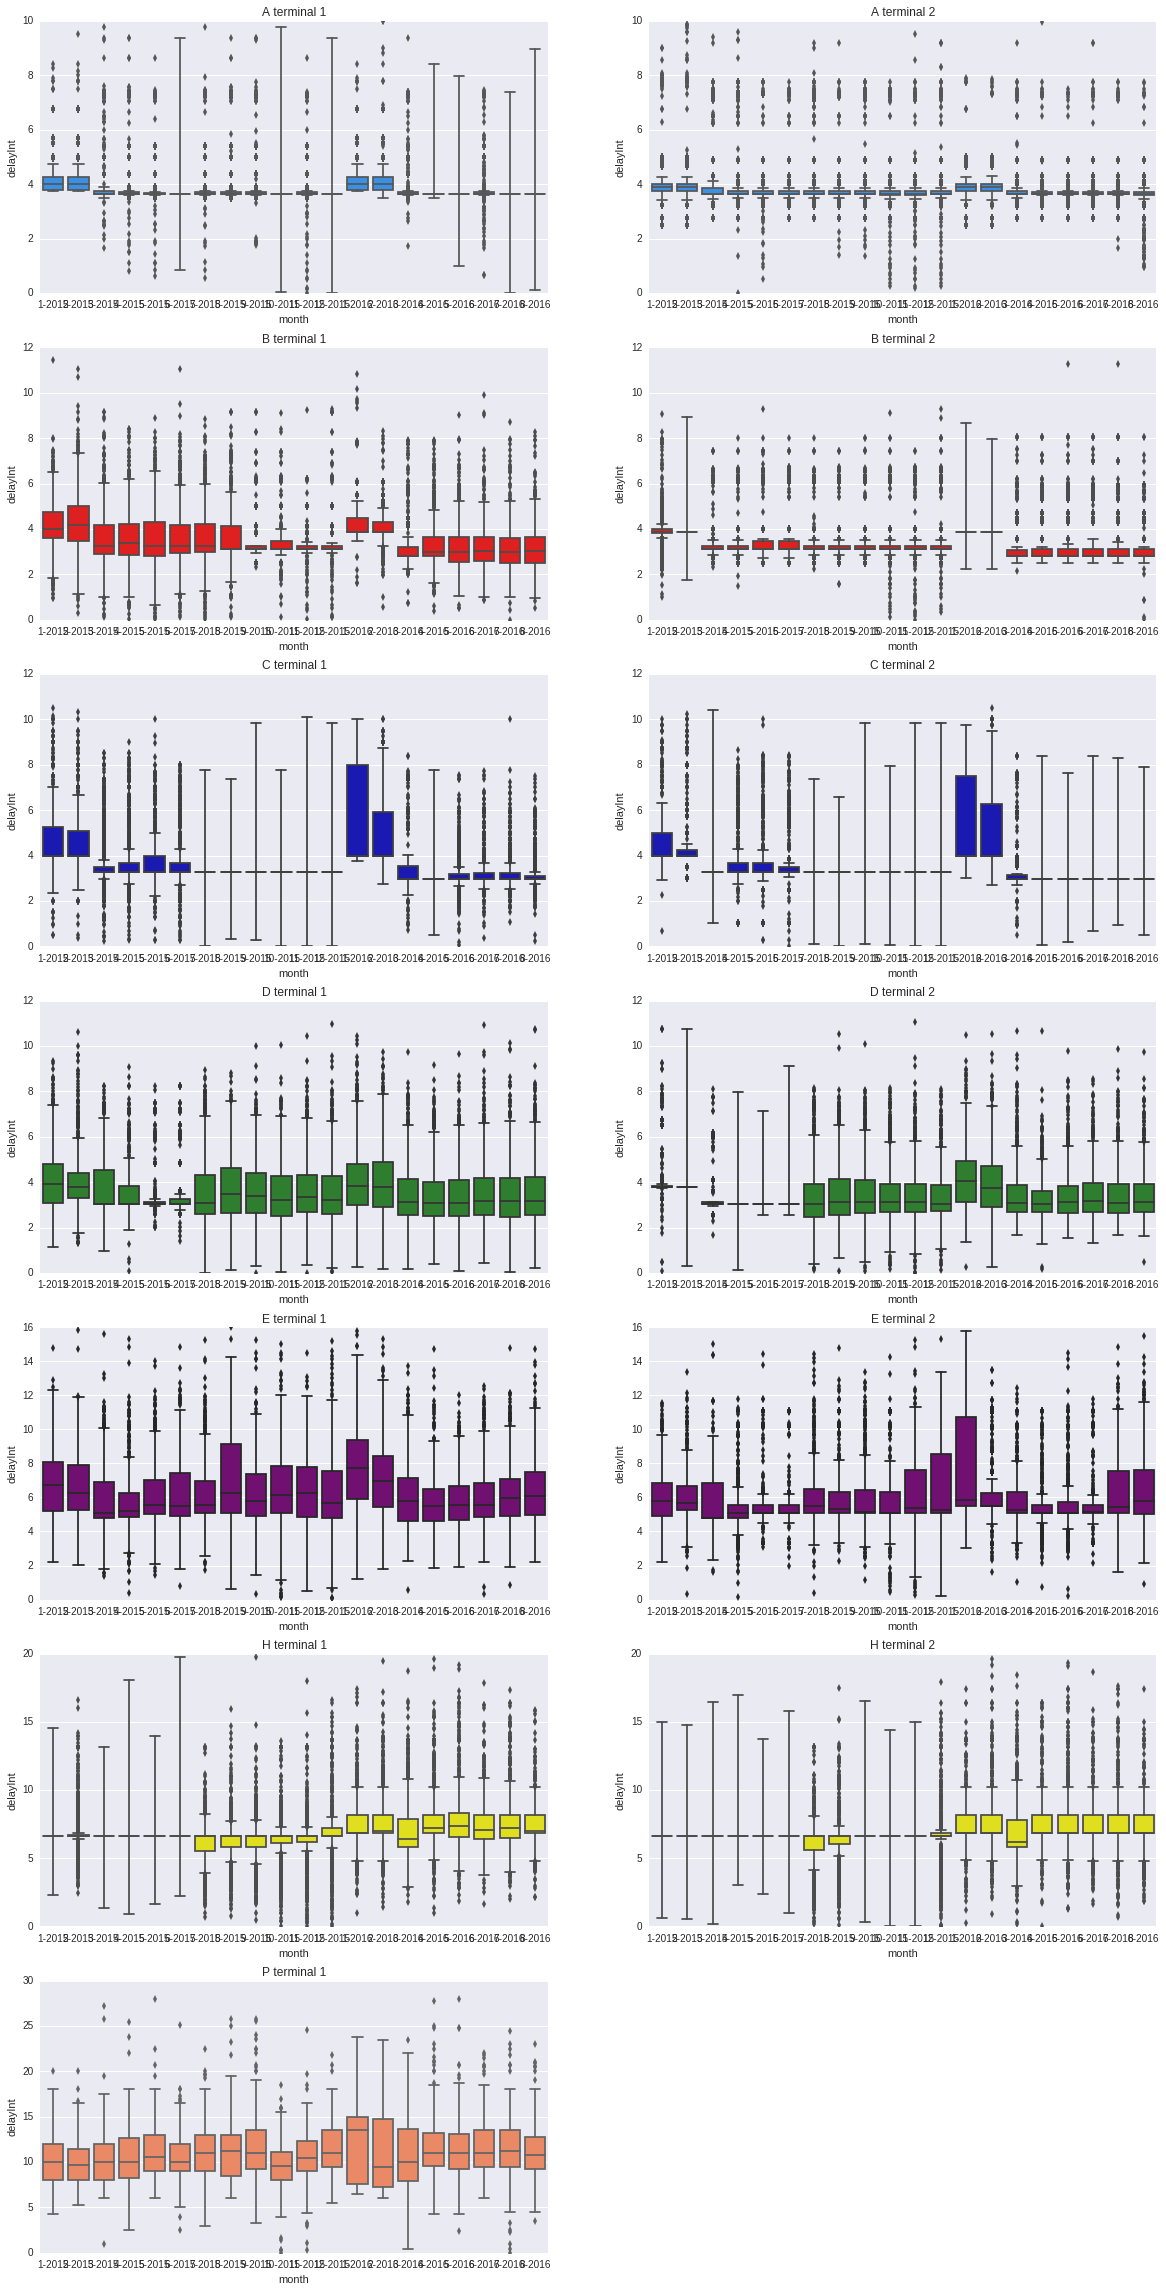

In [71]:
fig = plt.figure(figsize=(20,40))
plotId = 1
for lineId in range(len(lines)):
    line = lines[lineId]
    color = lineColors[line]        
    #print line, color 
    for i in [1,2]:
        terminal = i
        
        if line == 'P' and terminal == 2 :
            break
            
        #print terminal 
        plotMask = (waitingTime.line == line) & (waitingTime.terminal == terminal)
        #print sum(plotMask), len(plotMask)
        
               
        if (line != 'C' and line != 'H'): #radial lines selection for rush hour depending on terminal
            if i == 1:
                plotMask = plotMask & waitingTime.rushMorning
            else:
                plotMask = plotMask & waitingTime.rushEvening
        else:
            plotMask = (plotMask & (waitingTime.rushEvening | waitingTime.rushMorning))
           
        ax = fig.add_subplot(7,2,plotId)
        ax = sns.boxplot(waitingTime.month[plotMask],waitingTime.delayInt[plotMask],color=color)
        ax.set_title(line + ' terminal ' + str(i))
        plotId += 1

fig.savefig('plot.png')
